In [96]:
# Imports
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [97]:
# Hente inn datasettet
data = pd.read_csv('combined.csv')

In [98]:
# Sjekker om er riktig
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,...,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,2,60.33899,female,12.0,$11-$25k,white,1,4.0,43.0,17.097656,...,74.0,0.001000,0.000000,0,0,no,0.00,0.0,NaN,NaN
1,3,52.74698,female,12.0,under $11k,white,0,17.0,70.0,8.500000,...,45.0,0.790894,0.664917,0,0,no,0.75,0.5,NaN,NaN
2,4,42.38498,female,11.0,under $11k,white,0,3.0,75.0,9.099609,...,19.0,0.698975,0.411987,0,0,metastatic,0.90,0.5,NaN,NaN
3,6,93.01599,male,14.0,NaN,white,1,4.0,110.0,10.398438,...,27.0,0.284973,0.214996,0,0,no,0.00,0.0,NaN,NaN
4,7,62.37097,male,14.0,$25-$50k,white,0,9.0,78.0,11.699219,...,46.0,0.892944,0.820923,0,0,no,NaN,0.7,NaN,NaN


In [99]:
# Lage subplot: 2 rows, 2 columns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(rows=3, cols=2, specs=[[{}, {}], [{},{"type": "domain"}], [{"type": "domain"}, {"type": "domain"}]], 
                    subplot_titles=("Alderfordeling", "Inntekt vs utdanning", "Oppholdslengde vs alder", "Alder for død"))

# Lage alder grupper for noen visualiseringer
max_alder = data['alder'].max()
max_alder = round(max_alder)

# Dele inn i bins på 20
bins = list(range(0, max_alder + 20, 20)) + [float('inf')]
labels = [f"{i}-{i+20}" for i in range(0, max_alder, 20)] + [f"{max_alder}+"]

# Lage alder grupper for noen visualiseringer
data['alder_group'] = pd.cut(data['alder'], bins=bins, labels=labels)
# Nummer av død per gruppe
dod = data[data['sykehusdød'] == 1].groupby('alder_group')['sykehusdød'].count()

# Plot 1: Alder (Histogram)
alder_count = px.histogram(data, x='alder', nbins=10)
fig.add_trace(alder_count['data'][0], row=1, col=1)

# Plot 2: Inntekt vs utdanning (Box Plot)
inntekt_vs_utd = px.box(data, x='inntekt', y='utdanning')
fig.add_trace(inntekt_vs_utd['data'][0], row=1, col=2)

# Plot 3: Oppholdslengde vs alder (Scatter Plot)
alder_vs_opphold = px.scatter(data, x='alder', y='oppholdslengde', color='sykehusdød')
fig.add_trace(alder_vs_opphold['data'][0], row=2, col=1)

# Plot 4: Død med alder grupper (Pie Chart)
fig.add_trace(go.Pie(labels=dod.index, values=dod.values, hole=.3), row=2, col=2)


# Plot 5: Kjønn (Pie Chart)
kjonn_count = data['kjønn'].value_counts()
fig.add_trace(go.Pie(labels=kjonn_count.index, values=kjonn_count.values, hole=.3, title="Kjønn"), row=3, col=1)

# Plot 6: Etnesitet (Pie Chart)
etnisitet_count = data['etnisitet'].value_counts()
fig.add_trace(go.Pie(labels=etnisitet_count.index, values=etnisitet_count.values, hole=.3, title="Etnisitet"), row=3, col=2)

# Fikse layout
fig.update_layout(height=1000, width=1000, title_text="Combinert visualisering av person informasjon", showlegend=False)

# Show plot
fig.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_8956\954314107.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Visualisering av NaN

In [100]:
# Import 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

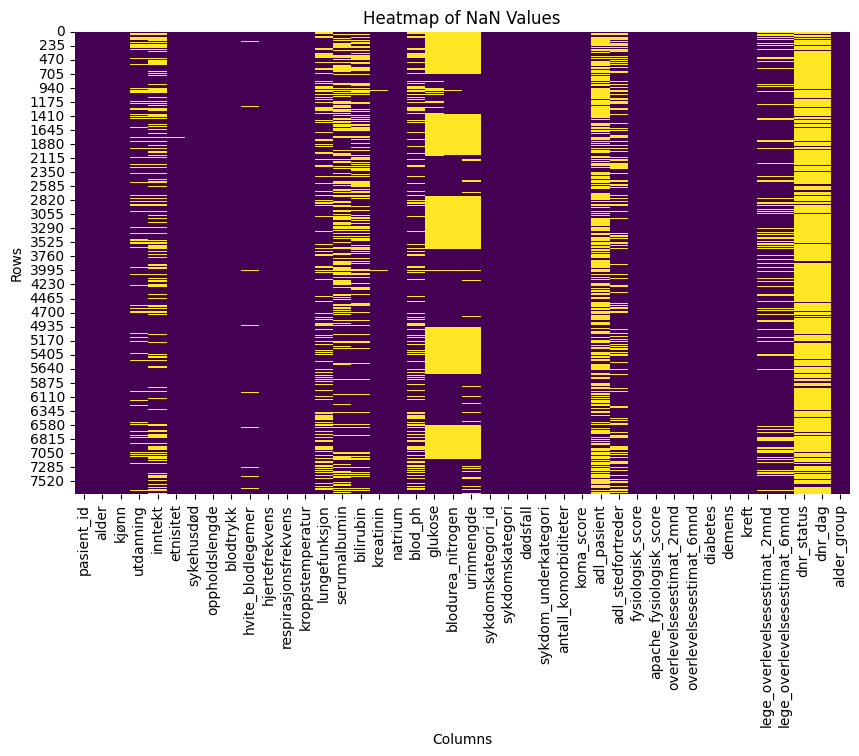

In [101]:
# Tell
nan_counts = data.isna().sum()

# Bar Chart for NaN counts
fig_nan_bar = px.bar(nan_counts[nan_counts > 0].reset_index(), 
                      x='index', y=0, 
                      title='Count of NaN Values in Each Column',
                      labels={'index': 'Columns', '0': 'NaN Count'})

fig_nan_bar.show()

# Heatmap for NaN counts
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of NaN Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()